Import Dataset and libraries

In [1]:
import pandas as pd

In [2]:
bank = pd.read_csv("Churn_Modelling.csv")

Show 5 first rows

In [3]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Redundant columns

In [4]:
custom = ["RowNumber", "CustomerId", "Surname"]

In [5]:
bank.drop(custom, axis=1, inplace=True)

EDA

In [6]:
bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Checking for missing data

In [7]:
bank.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split

Data Shuffle

In [9]:
bank = bank.sample(frac=1, random_state=252331)

In [10]:
X = bank.drop("Exited", axis=1)
y = bank["Exited"]

Data splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51, stratify=y) # get testing data

In [12]:
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [13]:
bank = X_train # renaming to bank for personal preferences

In [14]:
numerical = [column for column in bank if bank[column].dtype != "O"]

feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train[numerical])

StandardScaler()

In [18]:
bank[numerical] = scaler.transform(bank[numerical])

Feature Encoding

In [19]:
from feature_engine.encoding import OneHotEncoder

In [20]:
encoder = OneHotEncoder()

In [21]:
encoder.fit(bank)

OneHotEncoder()

In [22]:
bank = encoder.transform(bank)

In [23]:
bank.shape

(8000, 13)

In [24]:
X_train = bank # renaming back to X_train

Data Processing for Testing

In [25]:
X_test[numerical] = scaler.transform(X_test[numerical])
X_test = encoder.transform(X_test)

Deep Learning

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(13,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [28]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["accuracy", keras.metrics.AUC()]
)

In [29]:
model.fit(X_train, y_train, epochs=30, batch_size=128)

Epoch 1/30
63/63 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.8014 - auc: 0.7042
Epoch 2/30
63/63 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8281 - auc: 0.7978
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8434 - auc: 0.8250
Epoch 4/30
63/63 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8485 - auc: 0.8397
Epoch 5/30
63/63 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8550 - auc: 0.8465
Epoch 6/30
63/63 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8559 - auc: 0.8515
Epoch 7/30
63/63 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8594 - auc: 0.8547
Epoch 8/30
63/63 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8616 - auc: 0.8577
Epoch 9/30
63/63 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8639 - auc:

Test Prediction

In [30]:
import numpy as np
import seaborn as sns

In [31]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8590 - auc: 0.8640


[0.338812917470932, 0.859000027179718, 0.8640134334564209]

In [33]:
predictions = model.predict(X_test)

63/63 [==============================] - 0s 809us/step


In [34]:
predictions = np.round(predictions)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

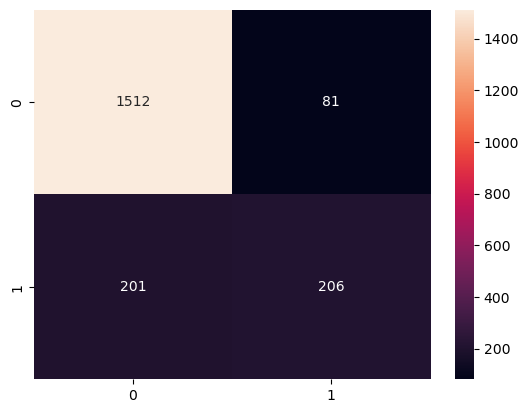

In [36]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.51      0.59       407

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Regularization 

In [38]:
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(13,)),
    # layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

In [39]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["accuracy", keras.metrics.AUC()]
)

In [40]:
model.fit(X_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7650 - auc_1: 0.5704
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8049 - auc_1: 0.7073
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8134 - auc_1: 0.7505
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8220 - auc_1: 0.7697
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8342 - auc_1: 0.7903
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8399 - auc_1: 0.8054
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8460 - auc_1: 0.8140
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8443 - auc_1: 0.8265
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3721 - accurac

Test Prediction

In [41]:
import numpy as np
import seaborn as sns

In [42]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 967us/step - loss: 0.3375 - accuracy: 0.8590 - auc_1: 0.8657


[0.33753135800361633, 0.859000027179718, 0.8657170534133911]

In [43]:
predictions = model.predict(X_test)

63/63 [==============================] - 0s 764us/step


In [44]:
predictions = np.round(predictions)

<AxesSubplot:>

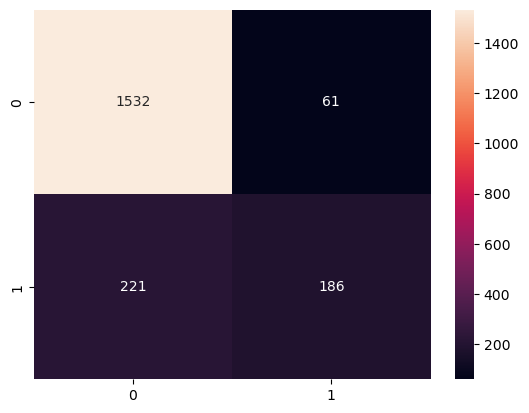

In [45]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

